<a href="https://colab.research.google.com/github/gabriel7268/PRH35.1_UFBA-ANP/blob/main/C%C3%B3digos/Exp_Cod_PRH_35_1_UFBA_MLPNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código Experimental MLPNN versão#01

Discente: Gabriel Azevedo Anunciação

Orientadores: Prof. Leizer Schnitman, Prof. Daniel Diniz Santana

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


In [ ]:
def white_noise(sd, x, m=0):
  k = np.random.normal(m,sd,len(x))
  return k

In [ ]:
# Função de normalizar os dados entre a e b:
def normalize_data(x, a, b):
  x_norm = a+((x - x.min())*(b-a))/(x.max()-x.min())
  return x_norm

In [ ]:
# Função de desnormalizar os dados entre a e b:
def denormalize_data(x, x_norm, a, b):
  x_denorm = ((x.max()-x.min())*(x_norm - a))/(b-a) + x.min()
  return x_denorm

In [ ]:
# Ler dados do arquivo csv e armazenar em um dataframe
dados = pd.read_excel('https://github.com/gabriel7268/Datasets/raw/main/dadosbcs.xlsx')
# Exemplos mais praticos, citar referencias
# Cabeçalho dos dados (5 primeiras linhas):
display(dados.head())
# Estatísticas:
display(dados.describe())

,Ab_Chocke,Freq,Vazao_Chocke
0,100,39.9,2.506781
1,100,40.0,2.505656
2,100,40.0,2.507063
3,100,40.0,2.507063
4,100,39.9,2.507063


,Ab_Chocke,Freq,Vazao_Chocke
count,34339.000000,34339.000000,34339.000000
mean,57.302338,56.695061,2.867193
std,40.130162,6.188125,1.011168
min,0.000000,39.900000,0.000563
25%,20.000000,59.900000,2.346188
50%,50.000000,59.900000,2.982656
75%,100.000000,59.900000,3.984188
max,100.000000,60.100000,4.272750


In [ ]:
# Informações, linhas nulas, tipo de dado etc
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34339 entries, 0 to 34338
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ab_Chocke     34339 non-null  int64  
 1   Freq          34339 non-null  float64
 2   Vazao_Chocke  34339 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 804.9 KB


In [ ]:
# Separando dados em dados de entrada e de saída:
# Variáveis preditoras:
X = dados.drop('Vazao_Chocke', axis=1)
print("Dados de Entrada: ")
display(X.head(20000))
# Variável a ser predita:
Y = dados.Vazao_Chocke
print("\nDados de Saída: ")
display(Y.head())

Dados de Entrada: 


,Ab_Chocke,Freq
0,100,39.9
1,100,40.0
2,100,40.0
3,100,40.0
4,100,39.9
...,...,...
19995,100,59.9
19996,100,60.0
19997,100,59.9
19998,100,59.9



Dados de Saída: 


0    2.506781
1    2.505656
2    2.507063
3    2.507063
4    2.507063
Name: Vazao_Chocke, dtype: float64

Text(0, 0.5, 'Vazão Válv Chocke (m³/h)')

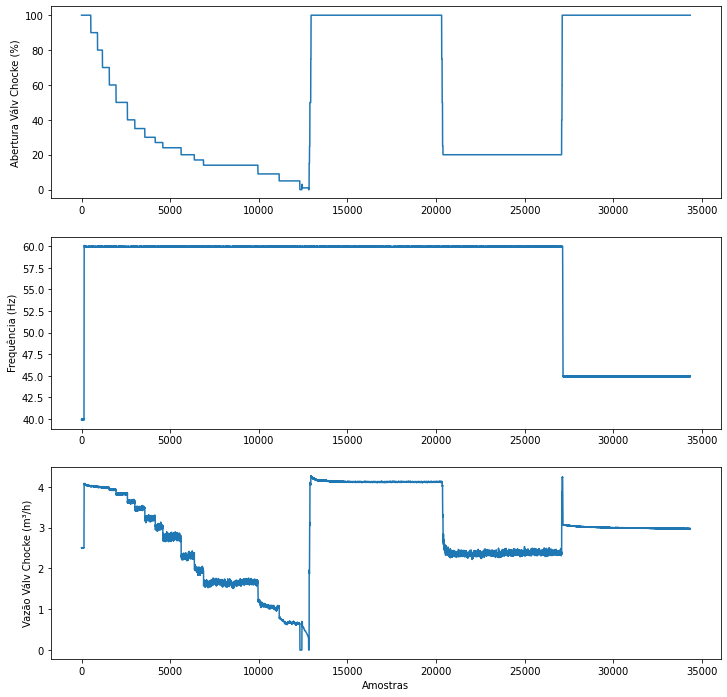

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(range(len(dados.Freq)),dados.Ab_Chocke)
plt.ylabel('Abertura Válv Chocke (%)')

plt.subplot(3,1,2)
plt.plot(range(len(dados.Freq)),dados.Freq)
plt.ylabel('Frequência (Hz)')

plt.subplot(3,1,3)
plt.plot(range(len(dados.Freq)),dados.Vazao_Chocke)
plt.xlabel('Amostras')
plt.ylabel('Vazão Válv Chocke (m³/h)')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


None

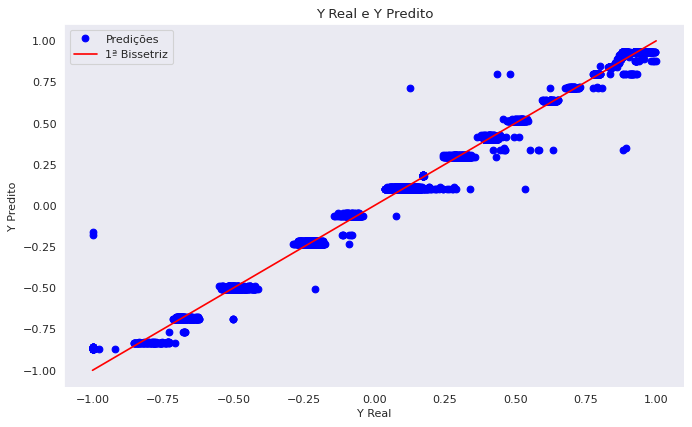

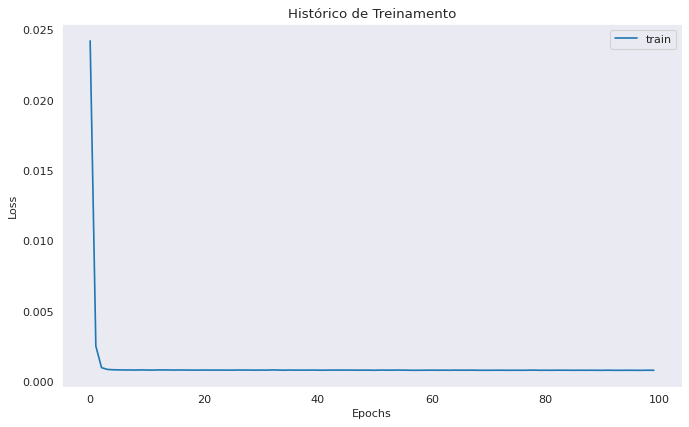

In [ ]:
X_norm = normalize_data(X, -1, 1)
Y_norm = normalize_data(Y, -1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm)
# Modelo Sequencial
model_de = keras.Sequential([layers.Dense(8, activation='tanh', input_shape=[2]),
                             layers.Dense(4, activation='tanh'),
                             layers.Dense(1, activation = 'linear')
])
# Parada antecipada
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
# Otimizador
sgd = SGD(learning_rate=0.001);
# Compilação
model_de.compile(loss='mse', optimizer='adam')
# Resumo do Modelo
display(model_de.summary())
# Treinamento
history = model_de.fit(X_train, Y_train, epochs=100, verbose=0, callbacks=[es])
# Predições
prediction_de = model_de.predict(X_test)
# Plotagem
sns.set_style('dark')
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(Y_test, prediction_de,'bo', label='Predições')
j = np.arange(-1,2)
plt.plot(j,j, 'r', label='1ª Bissetriz')
plt.title("Y Real e Y Predito")
plt.xlabel('Y Real')
plt.ylabel('Y Predito')
plt.legend()
plt.savefig('saida_real_saida_predita.png')
plt.show();
# Histórico
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Histórico de Treinamento'),
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.savefig('custo_epochs.png')
plt.show();
# PRIMEIRA BISSETRIZ JUNTO
# RNN

Text(0.5, 1.0, 'Predição da Vazão na Chocke')

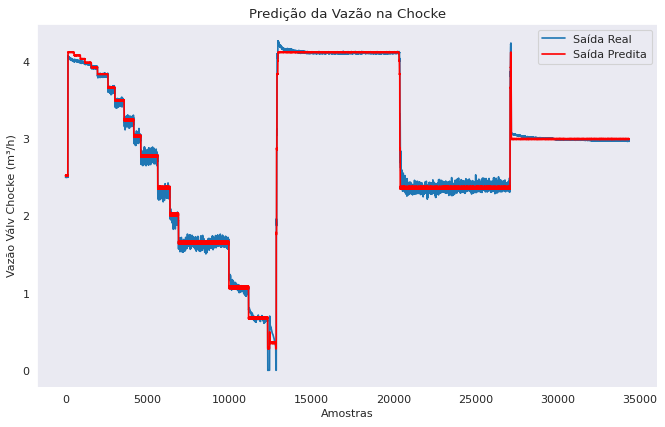

In [ ]:
plt.figure(figsize=(10,6), dpi=80)
prediction_de = prediction_de.flatten()
pre = model_de.predict(X_norm)
pre = pre.flatten()
pre_denorm = denormalize_data(Y, pre, -1, 1)
plt.plot(range(len(dados.Freq)),dados.Vazao_Chocke, label = 'Saída Real')
plt.plot(range(len(pre_denorm)),pre_denorm, 'r', label = 'Saída Predita')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Vazão Válv Chocke (m³/h)')
plt.title('Predição da Vazão na Chocke')

In [ ]:
# Transformando dados de saída em array
y = np.array(Y_test)
# Diminuindo dimensão da predição
prediction_de = prediction_de.flatten()
# Criando DataFrame de Saída Real e Saída Predita
dfm = pd.DataFrame({'Y': y, 'prediction_de': prediction_de,'Resíduo': prediction_de-y})
# Calculando correlação entre Saída Real e Saída Predita
print(dfm['Y'].corr(dfm['prediction_de']))
dfm.columns = ['Saída Real', 'Saída Predita', 'Resíduo']
display(dfm.head())
print(dfm.shape)
# R^2, MSE, RMSE, R^2 AJUSTADO, AIC..., ANALISE DE RESIDUO, TESTE DE HIPOTESE H0=MEDIA 0
# CORRELAÇÃO DOS PARAMETROS
# SIMULAÇÃO MONTE CARLO
# DADOS BCS

0.9979136741986365


,Saída Real,Saída Predita,Resíduo
0,0.923634,0.930082,0.006448
1,0.875049,0.911102,0.036053
2,0.927584,0.930082,0.002498
3,-0.688479,-0.688461,0.000019
4,0.931007,0.930082,-0.000925


(8585, 3)


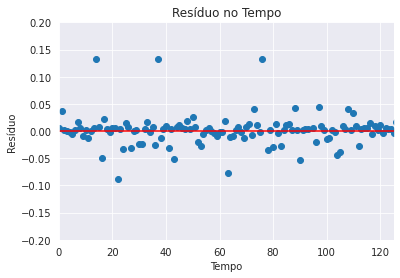

In [ ]:
y = np.array(Y_test)
res = prediction_de - y
sns.set_style('dark')
plt.figure()
plt.scatter(range(len(Y_test)), res)
plt.plot(range(len(Y_test)), [0]*len(Y_test), 'r-')
plt.title("Resíduo no Tempo")
plt.xlim(0,125)
plt.ylim(-0.2,0.2)
plt.xlabel('Tempo')
plt.ylabel('Resíduo')
plt.grid()
plt.savefig('residuo_no_tempo.png')
plt.show();

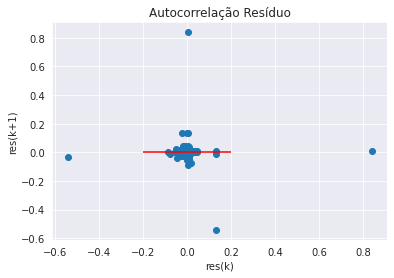

In [ ]:
sns.set_style('dark')
plt.scatter(res[0:123], res[1:124])
plt.xlabel('res(k)')
plt.ylabel('res(k+1)')
plt.title('Autocorrelação Resíduo')
plt.hlines(0, -0.2, 0.2, 'r')
plt.grid()

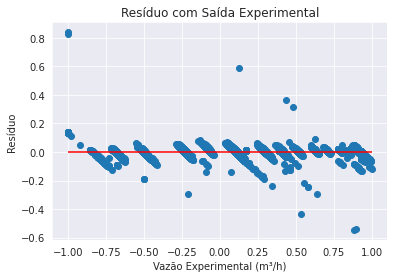

In [ ]:
sns.set_style('dark')
plt.scatter(Y_test, res)
plt.xlabel('Vazão Experimental (m³/h)')
plt.ylabel('Resíduo')
plt.title('Resíduo com Saída Experimental')
plt.hlines(0, -1, 1, 'r')
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


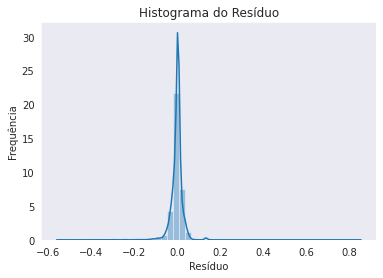

In [ ]:
sns.set_style('dark')
sns.distplot(res)
plt.title('Histograma do Resíduo')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.savefig('dist_residuo.png')
plt.show();
# TESTE HIPOTESE DIST NORMAL

AndersonResult(statistic=515.8111055135869, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


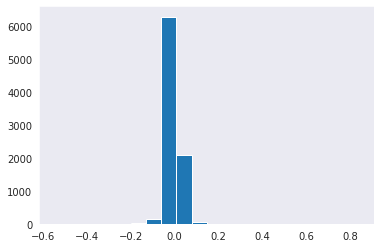

In [ ]:
y_2 = np.array(Y)
res_2 = pre_denorm - y_2
from scipy.stats import anderson
plt.hist(list(res), bins=20)
result = anderson(res)
print(result)

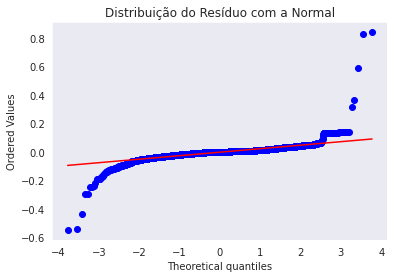

In [ ]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 0, scale = 0, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
plt.title('Distribuição do Resíduo com a Normal')
pylab.show()

## Mudando Hiper parâmetros

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


None

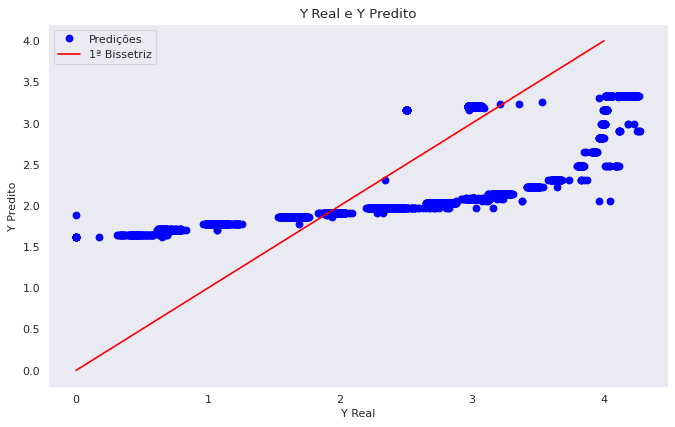

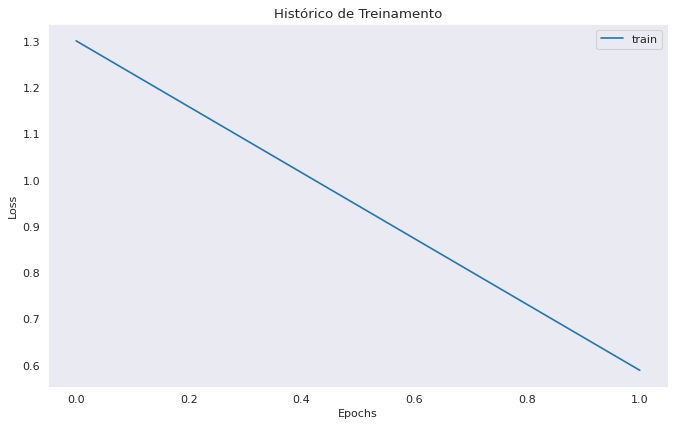

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Modelo Sequencial
model_sig = keras.Sequential([layers.Dense(8, activation='linear', input_shape=[2]),
                             layers.Dense(4, activation='linear'),
                             layers.Dense(1, activation = 'linear')
])
# Parada antecipada
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
# Otimizador
sgd = SGD(learning_rate=0.01);
# Compilação
model_sig.compile(loss='mae', optimizer=sgd)
# Resumo do Modelo
display(model_sig.summary())
# Treinamento
history = model_sig.fit(X_train, Y_train, epochs=2, verbose=0, callbacks=[es])
# Predições
prediction_sig = model_sig.predict(X_test)
# Plotagem
sns.set_style('dark')
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(Y_test, prediction_sig,'bo', label='Predições')
j = np.arange(Y_test.min(),Y_test.max())
plt.plot(j,j, 'r', label='1ª Bissetriz')
plt.title("Y Real e Y Predito")
plt.xlabel('Y Real')
plt.ylabel('Y Predito')
plt.legend()
plt.savefig('saida_real_saida_predita.png')
plt.show();
# Histórico
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Histórico de Treinamento'),
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.savefig('custo_epochs.png')
plt.show();
# PRIMEIRA BISSETRIZ JUNTO
# RNN

Text(0.5, 1.0, 'Predição da Vazão na Chocke')

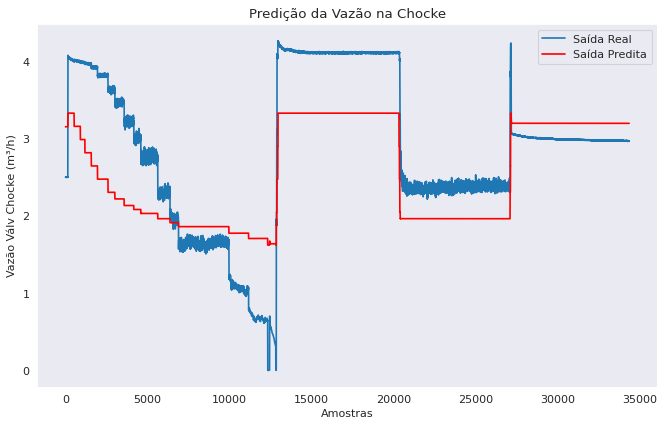

In [ ]:
plt.figure(figsize=(10,6), dpi=80)
prediction_sig = prediction_sig.flatten()
pred = model_sig.predict(X)
pred = pred.flatten()
plt.plot(range(len(dados.Vazao_Chocke)),dados.Vazao_Chocke, label = 'Saída Real')
plt.plot(range(len(pred)),pred, 'r', label = 'Saída Predita')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Vazão Válv Chocke (m³/h)')
plt.title('Predição da Vazão na Chocke')

In [ ]:
# Transformando dados de saída em array
y_sig = np.array(Y_test)
# Diminuindo dimensão da predição
prediction_sig = prediction_sig.flatten()
# Criando DataFrame de Saída Real e Saída Predita
dfm = pd.DataFrame({'Y': y_sig, 'prediction_sig': prediction_sig,'Resíduo': prediction_sig-y_sig})
# Calculando correlação entre Saída Real e Saída Predita
print(dfm['Y'].corr(dfm['prediction_sig']))
dfm.columns = ['Saída Real', 'Saída Predita', 'Resíduo']
display(dfm.head())
print(dfm.shape)
# R^2, MSE, RMSE, R^2 AJUSTADO, AIC..., ANALISE DE RESIDUO, TESTE DE HIPOTESE H0=MEDIA 0
# CORRELAÇÃO DOS PARAMETROS
# SIMULAÇÃO MONTE CARLO
# DADOS BCS

0.8090832997699471


,Saída Real,Saída Predita,Resíduo
0,2.988844,3.203151,0.214307
1,3.246750,2.137347,-1.109403
2,3.005719,3.203151,0.197432
3,3.002063,3.204030,0.201967
4,3.025969,3.204030,0.178061


(8585, 3)


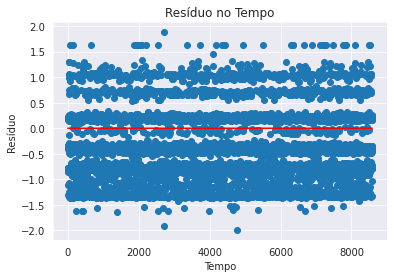

In [ ]:
y_sig = np.array(Y_test)
res_sig = prediction_sig - y_sig
sns.set_style('dark')
plt.figure()
plt.scatter(range(len(Y_test)), res_sig)
plt.plot(range(len(Y_test)), [0]*len(Y_test), 'r-')
plt.title("Resíduo no Tempo")
plt.xlabel('Tempo')
plt.ylabel('Resíduo')
plt.grid()
plt.savefig('residuo_no_tempo.png')
plt.show();

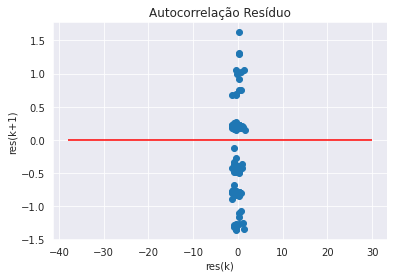

In [ ]:
sns.set_style('dark')
plt.scatter(res_sig[0:123], res_sig[1:124])
plt.xlabel('res(k)')
plt.ylabel('res(k+1)')
plt.title('Autocorrelação Resíduo')
plt.hlines(0, -38, 30, 'r')
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


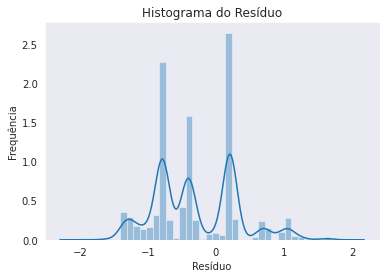

In [ ]:
sns.set_style('dark')
sns.distplot(res_sig)
plt.title('Histograma do Resíduo')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.savefig('dist_residuo.png')
plt.show();
# TESTE HIPOTESE DIST NORMAL

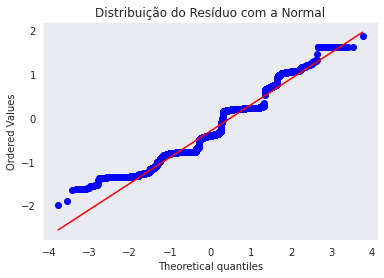

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(res_sig, dist="norm", plot=pylab)
plt.title('Distribuição do Resíduo com a Normal')
pylab.show()